
# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives

At the end of the experiment, you will be able to:


*  Apply K-Fold cross-validation method
*  Tune the hyperparameters of MLP Classifier.

## Dataset

### Description:

The MNIST dataset contains: 

1. 60,000 Handwritten digits as training samples and 10,000 Test samples, 
which means each digit occurs 6000 times in the training set and 1000 times in the testing set. (approximately). 
2. Each image is Size Normalized and Centered 
3. Each image is 28 X 28 Pixel with 0-255 Gray Scale Value. 
4. That means each image is represented as 784 (28 X28) dimension vector where each value is in the range 0- 255.



### History

Yann LeCun (Director of AI Research, Facebook, Courant Institute, NYU) was given the task of identifying the cheque numbers (in the ’90s) and the amount associated with that cheque without manual intervention. That is when this dataset was created which raised the bars and became a benchmark.

Yann LeCun and Corinna Cortes (Google Labs, New York) hold the copyright of the MNIST dataset, which is a subset of the original NIST datasets. This dataset is made available under the terms of the Creative Commons Attribution-Share Alike 3.0 license.

It is the handwritten digits dataset in which half of them are written by the Census Bureau employees and remaining by the high school students. The digits collected among the Census Bureau employees are easier and cleaner to recognize than the digits collected among the students.


### Challenges

Now, if you notice the images below, you will find that between 2 characters there are always certain similarities and differences. To teach a machine to recognize these patterns and identify the correct output.

![altxt](https://www.researchgate.net/profile/Radu_Tudor_Ionescu/publication/282924675/figure/fig3/AS:319968869666820@1453297931093/A-random-sample-of-6-handwritten-digits-from-the-MNIST-data-set-before-and-after.png)

Hence, all these challenges make this a good problem to solve in Machine Learning.


## Domain Information

Handwriting changes person to person. Some of us have neat handwriting and some have illegible handwriting such as doctors. However, if you think about it even a child who recognizes alphabets and numerics can identify the characters of a text even written by a stranger. But even a technically knowledgeable adult cannot describe the process by which he or she recognizes the text/letters. As you know this is an excellent challenge for Machine Learning.

![altxt](https://i.pinimg.com/originals/f2/7a/ac/f27aac4542c0090872110836d65f4c99.jpg)


## AI /ML Technique

### K-Fold Cross Validation


The problem with machine learning models is that you won’t get to know how well a model performs until you test it's performance on an independent data set (the data set which was not used for training the machine learning model).

Cross Validation comes in to picture here and helps us to estimate the performance of our model. One type of cross validation is the K-Fold Cross Validation

In our experiment, we are using the K-Fold Cross Validation technique to reduce (limit) the problem of overfitting. K-Fold Cross Validation is a way to evaluate and improve the performance of our machine learning model. It helps to prevent overfitting to a single train or test split.


When we are given a machine learning problem, we will be given two types of data sets — known data (training data set) and unknown data (test data set). By using cross-validation, you would be “testing” your machine learning model in the “training” phase to check for overfitting and to get an idea about how your machine learning model will generalize to independent data, which is the test data set given in the problem.


In the first round of cross validation, we have to divide our original training data set into two parts:

1. Cross validation training set
2. Cross validation testing set or Validation set

![alt text](https://cdn.talentsprint.com/aiml/Experiment_related_data/IMAGES/K-Fold.png)

The above image represents how the K-Fold Cross Validation works. We divide the dataset in to "K'' parts and will use the K-1 parts for training and remaining 1 for testing. We will rotate the test set and repeat the process for "K" times. 

we will train our machine learning model on the cross validation training set and test the model’s predictions against the validation set. we will get to know how accurate our machine learning model’s predictions are when we compare the model’s predictions on the validation set and the actual labels of the data points in the validation set.

To reduce the variability, multiple rounds of cross validation are performed by using different cross validation training sets and cross validation testing sets. The results from all the rounds are averaged to estimate the accuracy of the machine learning model.

**K-fold cross validation is performed as per the following steps:**

1. Randomly split the entire training dataset into k subsets.
2. Reserve one block as our test data
3. Train on each of the remaining K-1 blocks
4. Measure the performance against the test set
5. The average of our K recorded errors is called the cross-validation error and it will be used as a performance metric for the model

For this particular experiment, we have applied a k-foldclassifier() from the sklearn.


#### Expected time : 30mins

In [0]:
## Importing required packages
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

Loading the dataset from sklearn package

In [0]:
## Loading MNIST dataset from sklearn
digits = datasets.load_digits(n_class=10)
## Loding the data and storing in x
X = digits.data
## Loading the target data and storing it in y
y = digits.target

### Hyper Parameters

In [0]:
# Activation Functions
a = ["identity","logistic","tanh","relu"]
# Solvers (Optimizers)
s = ["lbfgs","sgd","adam"]
# Learning Rate
lr = [0.0001,0.001,0.01,0.1]
# Hidden Layers and number of nodes in each layer
h = [(5,2),(3,2),(6,3),(7,2)]

In [0]:
## Applying K-Folds cross-validator
kf = KFold(n_splits=4)

In [0]:
# Function to Create MLP classifier object with hyper parameters
def mlp(a,s,h,lr):
    clf = MLPClassifier(activation= a ,solver= s ,hidden_layer_sizes = h,learning_rate_init=lr)
    return clf  
# Function to calculate the accuracy
def accuracy(actual,predicted):
    return accuracy_score(actual,predicted)

#### Calculating Training and Testing accuracies

**Note :**  You may ignore the warning below as they are internal to the Sklearn's config and not related to the data

In [0]:
test_accuracy = []
train_accuracy = []
for i in range(10):
    k1 = np.random.randint(0,len(a))
    k2 = np.random.randint(0,len(s))
    k3 = np.random.randint(0,len(lr))
    k4 = np.random.randint(0,len(h))
    print("\nHyper-parameters = \n activation = ", a[k1],    "\n solver = ", s[k2], "\n learning_rate_init = ", lr[k3],         "\n hidden_layer_sizes = ", h[k4])
     #calling the mlp function with random hyper paramters
    clf = mlp(a[k1],s[k2],h[k4],lr[k3])
    tempTrain = 0
    tempTest = 0
    for nbrOfFolds,(train_index, test_index) in enumerate(kf.split(X)):
        ## Splitting the data into train and test
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test  = y[train_index], y[test_index]
        ##fit the data into the model
        clf.fit(X_train,Y_train)
        ##predicting the values on the fitted model using train data
        predTrain = clf.predict((X_train))
        #adding the accuracy
        tempTrain = tempTrain + accuracy(Y_train,predTrain)
        ##predict the values on the fitted model using test data
        predTest = clf.predict((X_test))
        #adding the accuracy
        tempTest = tempTest + accuracy(Y_test,predTest)
    ##Calculating the train accuracy
    print(f'Number of folds is{nbrOfFolds+1}')
    train_accuracy.append(tempTrain*1.0/(nbrOfFolds+1))
    ##Calculating the test accuracy
    test_accuracy.append(tempTest*1.0/(nbrOfFolds+1))
    print("(train,test) accuracy = ",tempTrain*1.0/(nbrOfFolds+1), tempTest*1.0/(nbrOfFolds+1))


Hyper-parameters = 
 activation =  relu 
 solver =  lbfgs 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (6, 3)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Number of folds is4
(train,test) accuracy =  0.3090517117938754 0.2787465973768869

Hyper-parameters = 
 activation =  logistic 
 solver =  sgd 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (3, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Number of folds is4
(train,test) accuracy =  0.13559035465117558 0.12634001484780996

Hyper-parameters = 
 activation =  tanh 
 solver =  lbfgs 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (5, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Number of folds is4
(train,test) accuracy =  0.4993768435847107 0.4673694630042069

Hyper-parameters = 
 activation =  relu 
 solver =  adam 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (3, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Number of folds is4
(train,test) accuracy =  0.15692719726659307 0.15914377629299678

Hyper-parameters = 
 activation =  relu 
 solver =  lbfgs 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (5, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Number of folds is4
(train,test) accuracy =  0.35837689645525056 0.327750556792873

Hyper-parameters = 
 activation =  identity 
 solver =  sgd 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (3, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Number of folds is4
(train,test) accuracy =  0.6555430630547275 0.5698205889631279

Hyper-parameters = 
 activation =  tanh 
 solver =  sgd 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (5, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Number of folds is4
(train,test) accuracy =  0.3292572074662014 0.29495050730017325

Hyper-parameters = 
 activation =  relu 
 solver =  adam 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (6, 3)
Number of folds is4
(train,test) accuracy =  0.10183664545236254 0.09738678544914625

Hyper-parameters = 
 activation =  logistic 
 solver =  adam 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (7, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Number of folds is4
(train,test) accuracy =  0.36005484767777174 0.324974016332591

Hyper-parameters = 
 activation =  relu 
 solver =  lbfgs 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (7, 2)
Number of folds is4
(train,test) accuracy =  0.23243169787129989 0.2097772828507795


In [0]:
test_accuracy, train_accuracy

([0.2787465973768869,
  0.12634001484780996,
  0.4673694630042069,
  0.15914377629299678,
  0.327750556792873,
  0.5698205889631279,
  0.29495050730017325,
  0.09738678544914625,
  0.324974016332591,
  0.2097772828507795],
 [0.3090517117938754,
  0.13559035465117558,
  0.4993768435847107,
  0.15692719726659307,
  0.35837689645525056,
  0.6555430630547275,
  0.3292572074662014,
  0.10183664545236254,
  0.36005484767777174,
  0.23243169787129989])

#### Plotting the data

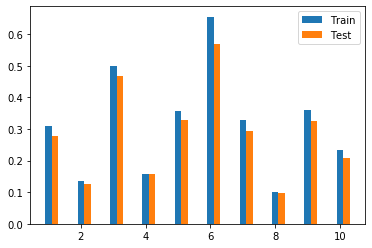

In [0]:
##Plotting the data
xx = np.array(range(1,11))
plt.bar(xx,train_accuracy,width=0.2)
plt.bar(xx+0.2, test_accuracy,width=0.2)
plt.legend(["Train","Test"])
plt.show()

#### Ungraded Exercise 

Vary the number of k-fold splits and observe the changes

In [0]:
kf = KFold(n_splits=4)

test_accuracy = []
train_accuracy = []
for i in range(5):
    k1 = np.random.randint(0,len(a))
    k2 = np.random.randint(0,len(s))
    k3 = np.random.randint(0,len(lr))
    k4 = np.random.randint(0,len(h))
    print("\nHyper-parameters = \n activation = ", a[k1],    "\n solver = ", s[k2], "\n learning_rate_init = ", lr[k3],         "\n hidden_layer_sizes = ", h[k4])
     #calling the mlp function with random hyper paramters
    clf = mlp(a[k1],s[k2],h[k4],lr[k3])
    tempTrain = 0
    tempTest = 0
    for nbrOfFolds,(train_index, test_index) in enumerate(kf.split(X)):
        ## Splitting the data into train and test
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test  = y[train_index], y[test_index]
        ##fit the data into the model
        clf.fit(X_train,Y_train)
        ##predicting the values on the fitted model using train data
        predTrain = clf.predict((X_train))
        #adding the accuracy
        tempTrain = tempTrain + accuracy(Y_train,predTrain)
        ##predict the values on the fitted model using test data
        predTest = clf.predict((X_test))
        #adding the accuracy
        tempTest = tempTest + accuracy(Y_test,predTest)
    ##Calculating the train accuracy
    print(f'Number of folds is{nbrOfFolds+1}')
    train_accuracy.append(tempTrain*1.0/(nbrOfFolds+1))
    ##Calculating the test accuracy
    test_accuracy.append(tempTest*1.0/(nbrOfFolds+1))
    print("(train,test) accuracy = ",tempTrain*1.0/(nbrOfFolds+1), tempTest*1.0/(nbrOfFolds+1))


Hyper-parameters = 
 activation =  tanh 
 solver =  sgd 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (5, 2)
Number of folds is4
(train,test) accuracy =  0.5080790040071463 0.48743999010146

Hyper-parameters = 
 activation =  tanh 
 solver =  sgd 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (6, 3)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Number of folds is4
(train,test) accuracy =  0.16971567214978223 0.16363771343726802

Hyper-parameters = 
 activation =  relu 
 solver =  sgd 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (6, 3)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Number of folds is4
(train,test) accuracy =  0.3902615494592886 0.34340262311309083

Hyper-parameters = 
 activation =  identity 
 solver =  adam 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (6, 3)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Number of folds is4
(train,test) accuracy =  0.3392659861787597 0.3244394951744618

Hyper-parameters = 
 activation =  logistic 
 solver =  lbfgs 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (7, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Number of folds is4
(train,test) accuracy =  0.4857907670413866 0.43024003959415985


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [0]:
test_accuracy, train_accuracy

([0.48743999010146,
  0.16363771343726802,
  0.34340262311309083,
  0.3244394951744618,
  0.43024003959415985],
 [0.5080790040071463,
  0.16971567214978223,
  0.3902615494592886,
  0.3392659861787597,
  0.4857907670413866])

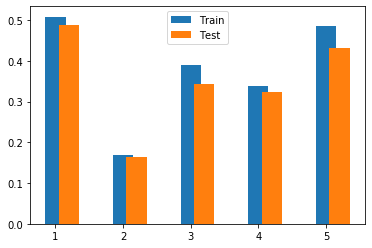

In [0]:
##Plotting the data
i = np.array(range(1,6))
plt.bar(i,train_accuracy,width=0.3)
plt.bar(i+0.2, test_accuracy,width=0.3)
plt.legend(["Train","Test"])
plt.show()